In [129]:
import numpy as np

In [130]:
board=[' ',' ',' ',
       ' ',' ',' ',
       ' ',' ',' ']

EPISODE=10_000
LR=0.01
GAMMA=0.95
EPSILON=1
EPSILON_DECAY_RATE=0.0001
EPSILON_DECAY_RATE_2=0.0001
EPSILON_MIN=0.01
WIN_REWARD=1
LOSE_REWARD=0.5
TIE_REWARD=0.8
MOVE_PENALTY=0
rewards=[]
rewards2=[]
agent1_total_win,agent2_total_win,agent1_total_loss,agent2_total_loss,agent1_total_tie,agent2_total_tie=[],[],[],[],[],[]

ova_epsilon1=[]
ova_epsilon2=[]

winner=0

In [131]:
q_table1 = {}
#q_table1=np.zeros([19683,3])

In [132]:
q_table2 = {}
#q_table2=np.zeros([19683,3])

In [133]:
def resetboard():
    board=[' ',' ',' ',
       ' ',' ',' ',
       ' ',' ',' ']
    return board

In [134]:
def check_dict(qtable,state,action=None):
    if action !=None:
        if (state,action) not in qtable:
            qtable[(state,action)]=0
            return qtable[(state, action)]
        else:
            return qtable[(state, action)]
    else:
        if(state) not in qtable:
            qtable[(state,)]=0
            return qtable[(state,)]
        else:
            return qtable[(state, action)]

In [135]:
def get_board(Board):
    print(Board[0] + "|" + Board[1] + "|" + Board[2])
    print("-+-+-")
    print(Board[3] + "|" + Board[4] + "|" + Board[5])
    print("-+-+-")
    print(Board[6] + "|" + Board[7] + "|" + Board[8])

In [136]:
def check_winner(board,turn,test):
    global winner,n
    if board[0] == board[1] == board[2] != ' ' or board[3] == board[4] == board[5] != ' ' or board[6] == board[7] == board[8] != ' '\
            or board[0] == board[3] == board[6] != ' ' or  board[1] == board[4] == board[7] != ' ' or board[2] == board[5] == board[8] != ' '\
            or board[2] == board[4] == board[6] != ' ' or board[0] == board[4] == board[8] != ' ':
        print("\nGame Over.\n")
        print(" **** " + turn + " won. ****")
        if test==False:
          if (turn == 'X' and n==0 or turn=='O' and n==1 ):
              winner = 1
              agent_1().assign_reward(winner)
              agent_2().assign_reward(winner)
          else:
              winner = 2
              agent_2().assign_reward(winner)
              agent_1().assign_reward(winner)
        else:
          if (turn == 'X' and n==0 or turn=='O' and n==1 ):
              print("Player win")
          else:
              print("agent win")
        return True

In [137]:
def check_tie(i):
    global winner
    if i==9:
        winner = 3
        agent_1().assign_reward(winner)
        agent_2().assign_reward(winner)
        print("\nGame Over.\n")
        print("It's a Tie!!")
        agent_1().assign_reward(winner)
        agent_2().assign_reward(winner)
        return True

In [138]:
state_board={' ':0,'X':1, 'O':2}

In [139]:
def game(ind, TEST=bool,PLAYER=bool):
    global board,n,winner
    board=resetboard()
    turn = "X"
    end=False
    randturn=2
    n=np.random.randint(0,2)
    if n==0:
        randturn=0
        print("agent 1 is x")
    if n==1:
        randturn=1
        print("agent 2 is x")
    winner=0
    for i in range(10):
        if TEST==False and PLAYER==False:
            if check_tie(i):
                board=resetboard()
                break
            #agent agent training
            if randturn==0:
                if turn == "X":
                    print("agent 1 turn")
                    board[agent_1().train(LR, GAMMA, EPSILON, EPSILON_MIN, EPSILON_DECAY_RATE, ind)]="X"
                    agent_1().assign_reward(winner)
                elif turn == "O":
                    print("agent 2 turn")
                    board[agent_2().train(LR, GAMMA, EPSILON, EPSILON_MIN, EPSILON_DECAY_RATE_2, ind)]="O"
                    agent_2().assign_reward(winner)
            if randturn == 1:
                if turn == "X":
                    print("agent 2 turn")
                    board[agent_2().train(LR, GAMMA, EPSILON, EPSILON_MIN, EPSILON_DECAY_RATE_2, ind)] = "X"
                    agent_2().assign_reward(winner)
                elif turn == "O":
                    print("agent 1 turn")
                    agent_1().assign_reward(winner)
                    board[agent_1().train(LR, GAMMA, EPSILON, EPSILON_MIN, EPSILON_DECAY_RATE, ind)] = "O"
            #reset winner
            winner=0
        # agent human training
        if TEST==False and PLAYER:
            if randturn==0:
                if turn == "X":
                    print("agent 1 turn")
                    board[agent_1().train(LR, GAMMA, EPSILON, EPSILON_MIN, EPSILON_DECAY_RATE, ind)]="X"
                    agent_1().assign_reward(winner)
                elif turn == "O":
                    print("player turn")
                    action=int(input())
                    board[action] = "X"
            if randturn == 1:
                if turn == "X":
                    print("player turn")
                    action=int(input())
                    board[action] = "X"
                elif turn == "O":
                    print("agent 1 turn")
                    agent_1().assign_reward(winner)
                    board[agent_1().train(LR, GAMMA, EPSILON, EPSILON_MIN, EPSILON_DECAY_RATE, ind)] = "O"
            #reset winner
            winner=0
        #agent agent testing
        if TEST and PLAYER==False:
            print("testing with agent")
            if check_tie(i):
                board=resetboard()
                break
            if randturn==0:
                if turn == "X":
                    print("agent 1 turn")
                    board[agent_1().test()] = "X"
                elif turn == "O":
                    print("agent 2 turn")
                    board[agent_2().test()]="O"
            if randturn == 1:
                if turn == "X":
                    print("agent 2 turn")
                    board[agent_2().test()] = "X"

                elif turn == "O":
                    print("agent 1 turn")
                    board[agent_1().test()] = "O"
            #reset winner
            winner=0
        #agent player training
        if PLAYER and TEST :
            print('playing with player')
            if check_tie(i):
                board=resetboard()
                break
            if randturn==0:
                if turn == "X":
                    print("player turn")
                    action=int(input())
                    board[action] = "X"
                elif turn == "O":
                    print("agent 1 turn")
                    board[agent_2().test()]="O"

            if randturn == 1:

                if turn == "X":
                    print("agent 1 turn")
                    board[agent_2().test()] = "X"

                elif turn == "O":
                    print("player turn")
                    action=int(input())
                    board[action] = "O"
            #reset winner
            winner=0
        get_board(board)
        if TEST==True:
          if i >= 4:
              if check_winner(board,turn,True):
                  board=resetboard()
                  break
        else:
            if i >= 4:
              if check_winner(board,turn,False):
                  board=resetboard()
                  break
        if turn == 'X':
            turn = 'O'
        else:
            turn = 'X'

In [140]:
def agent_move():
    board_state_tuple = tuple([state_board[cell] for cell in board])
    available_move=[i for i,v in enumerate(board_state_tuple) if v==0]
    try:
      return np.random.choice(available_move) , board_state_tuple, available_move
    except:
      return None,board_state_tuple, available_move

In [141]:
def epsilon_greedy(qtable, state, epsilon,available):
    p = np.random.uniform(0, 1)
    if p > epsilon:
        print("agent exploiting")
        q_values_for_available_actions = [check_dict(qtable,state,action) for action in available]
        max_q_value = max(q_values_for_available_actions)
        best_actions = [action for action in available if check_dict(qtable, state, action) == max_q_value]
        if best_actions:
            action = np.random.choice(best_actions)
        else:
            action = np.random.choice(available)
    else:
        print('agent exploring')
        action, state, available = agent_move()
    return action

In [142]:
class agent_1():
  def __init__(self):
    self.lr=LR
    self.gamma=GAMMA

  def train(self,lr, gamma, epsilon, epsilon_min, decay, ind):
    global action,state
    self.lr=lr
    self.gamma=gamma
    epsilon_decaying = max((epsilon_min), (epsilon * np.exp(-decay * ind)))
    _, state,available = agent_move()
    action = epsilon_greedy(q_table1, state, epsilon_decaying,available)
    check_dict(q_table1,state,action)
    ova_epsilon1.append(epsilon_decaying)
    return(action)

  def assign_reward(self,winner):
      if winner == 1:
          self.reward = WIN_REWARD
          agent1_total_win.append(1)
          print("agent 1 WIN")
      elif winner == 2:
          agent1_total_loss.append(1)
          self.reward = -LOSE_REWARD
      elif winner == 3:
          agent1_total_tie.append(1)
          self.reward = TIE_REWARD
      if winner == 0:
          self.reward = -MOVE_PENALTY
      rewards.append(self.reward)
      _, new_state,available = agent_move()
      new_q=[check_dict(q_table1,new_state,actions) for actions in available]
      maxq=max(new_q) if new_q else 0.0
      q_table1[((state),action)] = (1 - self.lr) * q_table1[((state),action)] + self.lr * (
          self.reward + self.gamma * maxq)

  def test(self):
      _,st, available = agent_move()
      q_values_for_available_actions = [check_dict(q_table1,st,action) for action in available]
      max_q_value = max(q_values_for_available_actions)
      best_actions = [action for action in available if check_dict(q_table1, st, action) == max_q_value]
      if best_actions:
        print(f"best availble action:{best_actions}")
        action = np.random.choice(best_actions)
      else:
        print("random action is picked")
        action = np.random.choice(available)
      return action

In [143]:
class agent_2():
  def __init__(self):
    self.lr=LR
    self.gamma=GAMMA

  def train(self,lr, gamma, epsilon, epsilon_min, decay, ind,):
    global action2,state2
    self.lr=lr
    self.gamma=gamma
    epsilon_decaying2 = max((epsilon_min), (epsilon * np.exp(-decay * ind)))
    _, state2, available = agent_move()
    action2 = epsilon_greedy(q_table2, state2, 0,available)
    check_dict(q_table2,state2,action2)
    ova_epsilon2.append(epsilon_decaying2)
    return(action2)

  def assign_reward(self,winner):
    if winner == 2:
        print("agent 2 WIN")
        agent2_total_win.append(1)
        self.reward2 = WIN_REWARD
    elif winner == 0:
        self.reward2 = -MOVE_PENALTY
    elif winner == 1:
        agent2_total_loss.append(1)
        self.reward2 = -LOSE_REWARD
    elif winner == 3:
        agent2_total_tie.append(1)
        self.reward2 = TIE_REWARD
    rewards2.append(self.reward2)
    _, new_state2, available = agent_move()
    new_q=[check_dict(q_table2,new_state2,actions) for actions in available]
    maxq=max(new_q) if new_q else 0.0
    q_table2[((state2),action2)] = (1 - self.lr) * q_table2[((state2),action2)] + self.lr * (
        self.reward2 + self.gamma * maxq)

  def test(self):
      _,st, available_actions = agent_move()
      q_values_for_available_actions = [check_dict(q_table2,st,action) for action in available_actions]
      max_q_value = max(q_values_for_available_actions)
      best_actions = [action for action in available_actions if check_dict(q_table2, st, action) == max_q_value]
      if best_actions:
        print(f"best availble action:{best_actions}")
        action2 = np.random.choice(best_actions)
      else:
        print("random action is picked")
        action2 = np.random.choice(available_actions)
      return action2

In [144]:
for i in range(EPISODE):
    print("---------------")
    game(i,TEST=False,PLAYER=False)
    print(winner)

Streaming output truncated to the last 5000 lines.
-+-+-
X|O| 
agent 1 turn
agent exploring
X|X|O
-+-+-
O|O|X
-+-+-
X|O|X

Game Over.

It's a Tie!!
3
---------------
agent 2 is x
agent 2 turn
agent exploiting
X| | 
-+-+-
 | | 
-+-+-
 | | 
agent 1 turn
agent exploring
X| | 
-+-+-
 | |O
-+-+-
 | | 
agent 2 turn
agent exploiting
X| | 
-+-+-
 | |O
-+-+-
X| | 
agent 1 turn
agent exploiting
X| | 
-+-+-
O| |O
-+-+-
X| | 
agent 2 turn
agent exploiting
X| | 
-+-+-
O|X|O
-+-+-
X| | 
agent 1 turn
agent exploiting
X| |O
-+-+-
O|X|O
-+-+-
X| | 
agent 2 turn
agent exploiting
X| |O
-+-+-
O|X|O
-+-+-
X| |X

Game Over.

 **** X won. ****
agent 2 WIN
2
---------------
agent 2 is x
agent 2 turn
agent exploiting
X| | 
-+-+-
 | | 
-+-+-
 | | 
agent 1 turn
agent exploiting
X| | 
-+-+-
 |O| 
-+-+-
 | | 
agent 2 turn
agent exploiting
X| | 
-+-+-
 |O| 
-+-+-
X| | 
agent 1 turn
agent exploiting
X| | 
-+-+-
O|O| 
-+-+-
X| | 
agent 2 turn
agent exploiting
X| | 
-+-+-
O|O|X
-+-+-
X| | 
agent 1 turn
agent exploitin

In [145]:
q_table1

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 5): 1.5176855874535751e-06,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 0): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 1): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 2): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 3): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 4): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 6): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 7): 0.0,
 ((0, 0, 0, 0, 0, 1, 0, 0, 0), 8): 1.6837376219684916e-06,
 ((0, 0, 0, 0, 0, 1, 0, 2, 0), 4): 0.0,
 ((0, 0, 0, 0, 1, 1, 0, 2, 0), 0): 0.0,
 ((0, 0, 0, 0, 1, 1, 0, 2, 0), 1): 0,
 ((0, 0, 0, 0, 1, 1, 0, 2, 0), 2): 0,
 ((0, 0, 0, 0, 1, 1, 0, 2, 0), 3): 0,
 ((0, 0, 0, 0, 1, 1, 0, 2, 0), 6): 0,
 ((0, 0, 0, 0, 1, 1, 0, 2, 0), 8): 0,
 ((0, 0, 2, 0, 1, 1, 0, 2, 0), 0): 8.323934943419487e-06,
 ((1, 0, 2, 0, 1, 1, 0, 2, 0), 1): 0,
 ((1, 0, 2, 0, 1, 1, 0, 2, 0), 3): 0.00014972759999999999,
 ((1, 0, 2, 0, 1, 1, 0, 2, 0), 6): -0.005,
 ((1, 0, 2, 0, 1, 1, 0, 2, 0), 8): 0,
 ((1, 0, 2, 2, 1, 1, 0, 2, 0), 6): 0.00029795792399999995,
 ((1, 0, 2, 2, 1, 1, 1, 2, 0), 1): -0

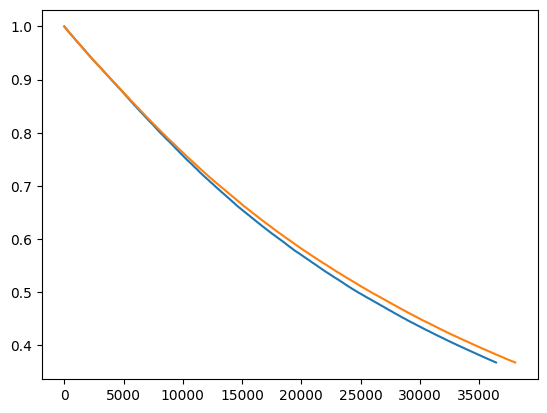

---- TRAINING RESULT ----
agent 1 avg reward 0.47533000000006415
agent 1 total win 1738
agent 1 total loss 4859
agent 1 total tie 6806
agent 2 avg reward 0.9434800000000009
agent 2 total win 4859
agent 2 total loss 1738
agent 2 total tie 6806
-------------------------


In [146]:
import matplotlib.pyplot as plt
plt.plot(ova_epsilon1)
plt.plot(ova_epsilon2)
plt.show()
print("---- TRAINING RESULT ----")
print(f"agent 1 avg reward {sum(rewards) / EPISODE}")
print(f"agent 1 total win {sum(agent1_total_win)}")
print(f"agent 1 total loss {sum(agent1_total_loss)}")
print(f"agent 1 total tie {sum(agent1_total_tie)}")
print(f"agent 2 avg reward {sum(rewards2) / EPISODE}")
print(f"agent 2 total win {sum(agent2_total_win)}")
print(f"agent 2 total loss {sum(agent2_total_loss)}")
print(f"agent 2 total tie {sum(agent2_total_tie)}")
print('-------------------------')

In [151]:
print("-------AGENT TEST------------")
i=1
for i in range(1):
    print("---------------")
    game(i,TEST=True,PLAYER=True)

-------AGENT TEST------------
---------------
agent 1 is x
playing with player
player turn
0
X| | 
-+-+-
 | | 
-+-+-
 | | 
playing with player
agent 1 turn
best availble action:[4]
X| | 
-+-+-
 |O| 
-+-+-
 | | 
playing with player
player turn
8
X| | 
-+-+-
 |O| 
-+-+-
 | |X
playing with player
agent 1 turn
best availble action:[7]
X| | 
-+-+-
 |O| 
-+-+-
 |O|X
playing with player
player turn
1
X|X| 
-+-+-
 |O| 
-+-+-
 |O|X
playing with player
agent 1 turn
best availble action:[2]
X|X|O
-+-+-
 |O| 
-+-+-
 |O|X
playing with player
player turn
6
X|X|O
-+-+-
 |O| 
-+-+-
X|O|X
playing with player
agent 1 turn
best availble action:[3]
X|X|O
-+-+-
O|O| 
-+-+-
X|O|X
playing with player
player turn
5
X|X|O
-+-+-
O|O|X
-+-+-
X|O|X
playing with player

Game Over.

It's a Tie!!
